In [3]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install numpy
%pip install scipy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Load the student performance dataset
df = pd.read_csv("C:\\Users\\varch\\OneDrive\\Desktop\\coding\\SAPP\\pictures\\student-mat.csv",sep = ';')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.info()
print("\nSummary statistics:")
print(df.describe())
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

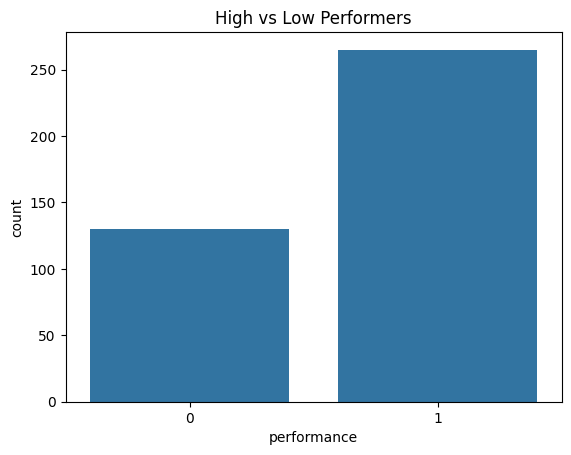

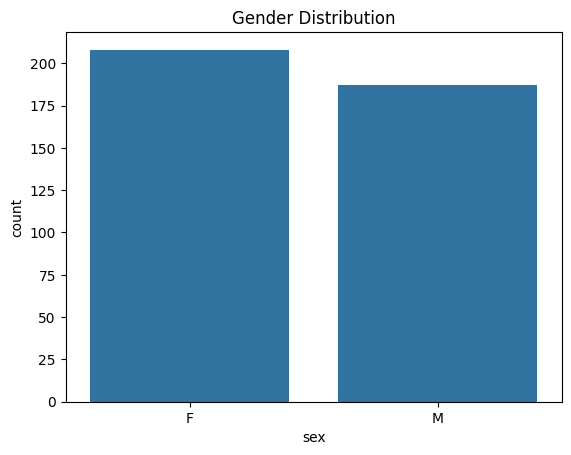

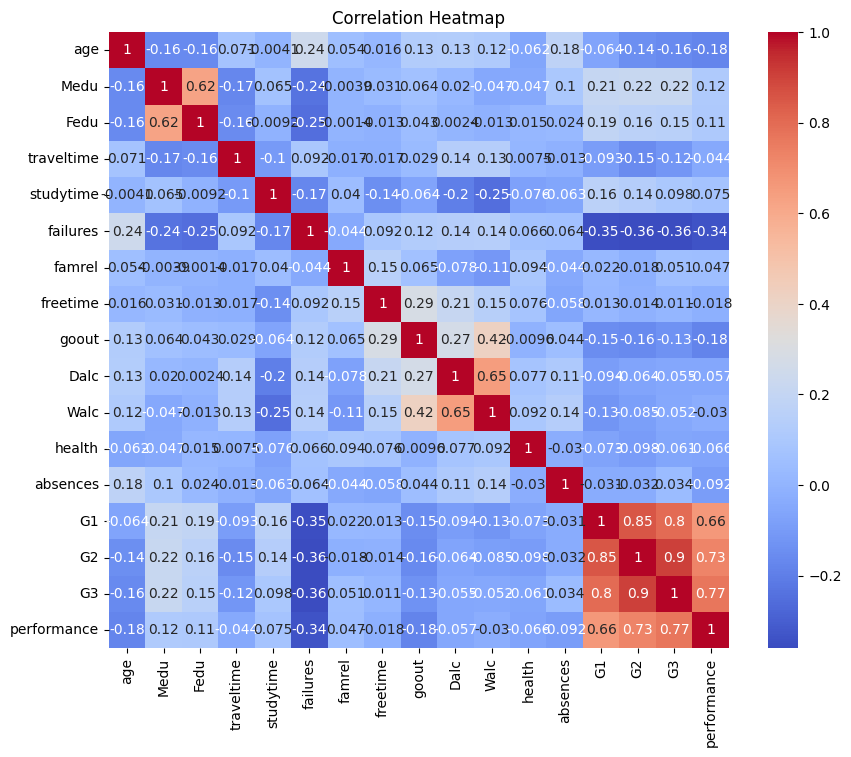

In [7]:
# Create a binary target: 1 = High performer, 0 = Low performer
df['performance'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Class balance
sns.countplot(x='performance', data=df)
plt.title("High vs Low Performers")
plt.show()

# Gender distribution
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

# Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [8]:
# Drop original grade columns (we don't want to leak answers to the model)
df_model = df.drop(columns=['G1', 'G2', 'G3'])

# One-hot encode categorical variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Features (X) and Target (y)
X = df_model.drop(columns=['performance'])
y = df_model['performance']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Logistic Regression Results:
Accuracy: 0.6582278481012658
              precision    recall  f1-score   support

           0       0.47      0.35      0.40        26
           1       0.72      0.81      0.76        53

    accuracy                           0.66        79
   macro avg       0.60      0.58      0.58        79
weighted avg       0.64      0.66      0.64        79



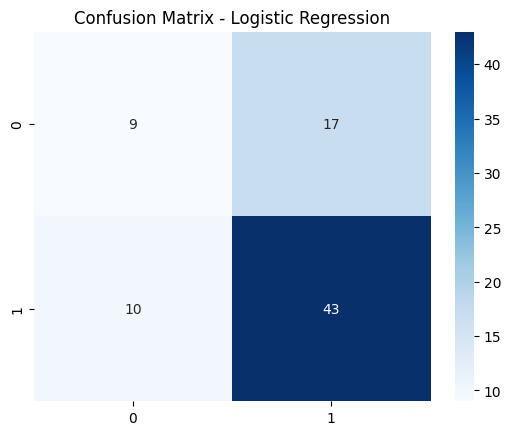


Random Forest Results:
Accuracy: 0.6835443037974683
              precision    recall  f1-score   support

           0       0.55      0.23      0.32        26
           1       0.71      0.91      0.79        53

    accuracy                           0.68        79
   macro avg       0.63      0.57      0.56        79
weighted avg       0.65      0.68      0.64        79



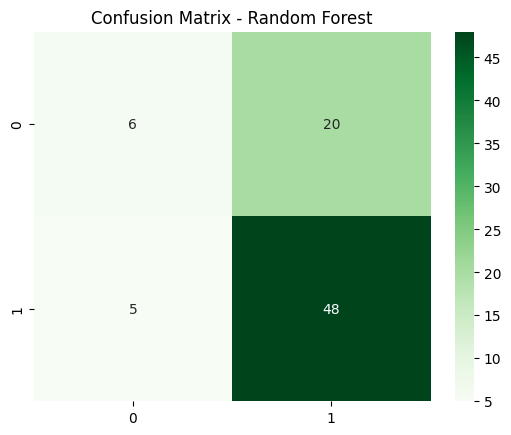

In [10]:
# Logistic Regression predictions
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Random Forest predictions
y_pred_rf = rf_clf.predict(X_test)
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


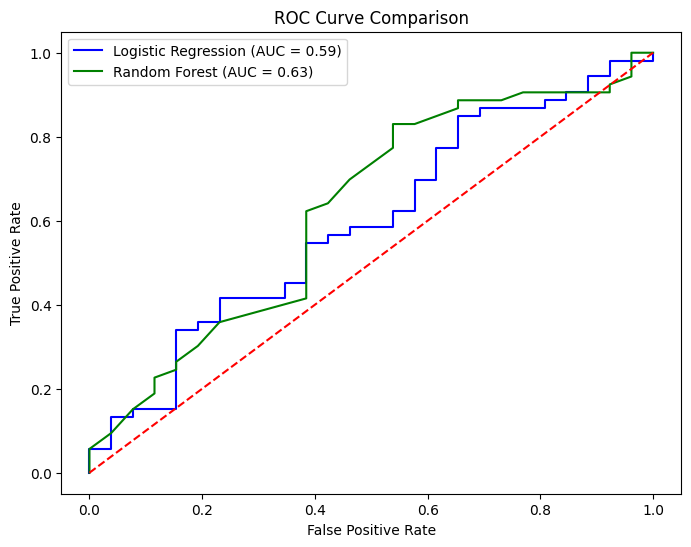

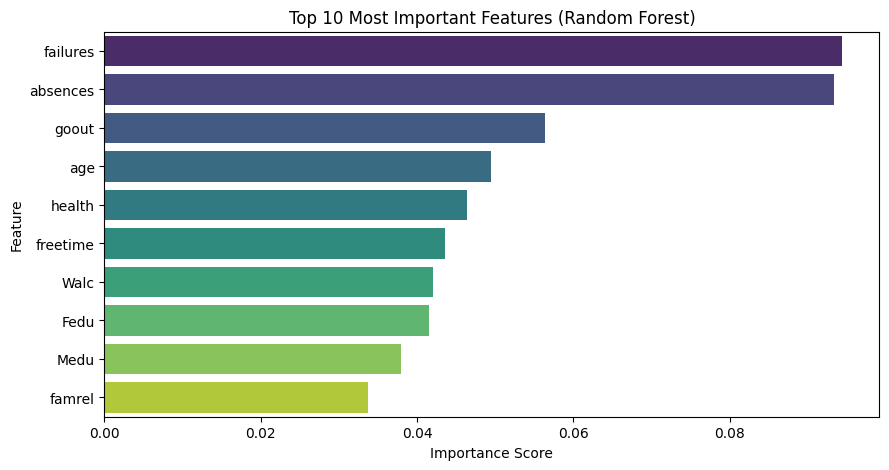

In [11]:
from sklearn.metrics import roc_curve, auc

# ===== ROC Curve =====
# Logistic Regression ROC
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest ROC
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot both ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", color="blue")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="green")
plt.plot([0, 1], [0, 1], 'r--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

# ===== Feature Importance for Random Forest =====
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # Top 10

plt.figure(figsize=(10,5))
sns.barplot(
    x=importances[indices],
    y=X.columns[indices],
    hue=X.columns[indices],  # add hue
    palette="viridis",
    dodge=False,
    legend=False
)
plt.title("Top 10 Most Important Features (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [12]:
import pickle

# Save the trained model (Example: Random Forest)
pickle.dump(rf_clf, open("model.pkl", "wb"))


In [13]:
from sklearn.pipeline import Pipeline


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Final pipeline with preprocessing + model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_clf)  # or log_reg if that’s your final choice
])

# Train pipeline
pipeline.fit(X, y)

# Save pipeline
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(pipeline, f)
